> This is a rework of my task during Machine Learning class in 2022.

> Goal(s):
- to construct a model using the Gradient Descent based Multiple Linear Regression approach (scratch) to predict a company's profit based on the given dataset.

> References **[A]**:
1.  https://www.scribbr.com/statistics/correlation-coefficient/
2.  https://www.statology.org/multicollinearity-regression/
3.  https://online.stat.psu.edu/stat462/node/180/
4.  https://statisticsbyjim.com/regression/interpret-r-squared-regression/
5.  https://www.simplypsychology.org/p-value.html
6.  https://www.statology.org/anova-f-value-p-value/
7.  https://www.statology.org/dummy-variable-trap/

> References **[B]**:
*  Class/University notes
*  https://medium.com/@pritioli/implementing-linear-regression-from-scratch-747343634494
*  https://marnec.github.io/ML/ML3/

# Import Essentials

## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/Startups_Data.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
def split_dataset(x, y, size, state=np.random.randint(0, 100)):
  data_A_X, data_B_X, data_A_Y, data_B_Y = train_test_split(x, y, train_size = size, random_state = state)
  data_A = pd.concat([data_A_X, data_A_Y], axis=1)
  data_B = pd.concat([data_B_X, data_B_Y], axis=1)
  return data_A, data_B

In [4]:
data_train, data_test = split_dataset(data.drop(columns='Profit'), data['Profit'], 0.8, 21)

> Dividing the raw data into training and testing sets using a 4:1 ratio.

# Dataset Overview

In [5]:
data_train.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
30,61994.48,115641.28,91131.24,Florida,99937.59
21,78389.47,153773.43,299737.29,New York,111313.02
19,86419.70,153514.11,0.00,New York,122776.86
11,100671.96,91790.61,249744.55,California,144259.40
22,73994.56,122782.75,303319.26,Florida,110352.25


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 30 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        40 non-null     float64
 1   Administration   40 non-null     float64
 2   Marketing Spend  40 non-null     float64
 3   State            40 non-null     object 
 4   Profit           40 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.9+ KB


> This training dataset consists of both independent (all numerical) and dependent variables of equal length with no null values. Therefore, there is no need to proceed to the Handling Missing Value step.

In [7]:
data_train.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,40.000000,40.000000,40.000000,40.000000
mean,73918.091250,117582.747500,217138.449250,112617.875500
std,45107.262362,28729.927723,117089.377386,39802.103285
min,0.000000,51283.140000,0.000000,14681.400000
25%,42692.090000,99681.367500,138943.625000,90518.427500
50%,74661.715000,118608.950000,212716.240000,107142.790000
75%,100982.240000,135845.752500,298932.675000,142253.990000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
numvar_col = ['R&D Spend', 'Administration', 'Marketing Spend']
ctgvar_col = ['State']

In [9]:
for i in ctgvar_col:
  print(data_train[i].value_counts())
  print()

State
New York      14
California    14
Florida       12
Name: count, dtype: int64



> The categorical columns in the training dataset are well-formatted with no typos or unusual values. Therefore, there is no need to proceed to the Handling Missing/Error Value step or perform any corrections on the categorical values.

# Exploratory Data Analysis (EDA)

In [10]:
def visualize_numvar(df, col_names, col_target, type):
  data = df[col_names]
  rows = np.ceil((len(data.columns)) / 2).astype(int)
  fig, axs = plt.subplots(rows, 2, figsize=(6, 5))
  axs = axs.flatten()
  for idx, col_name in enumerate(col_names):
    if(type == 'dist'):
      sns.histplot(data[col_name], ax=axs[idx], kde=True)
      axs[idx].set_title(f"Distribution Plot ({col_name})")
    elif(type == 'box'):
      sns.boxplot(x=df[col_target], ax=axs[idx])
      axs[idx].set_title(f"Box Plot ({col_name})")
    elif(type == 'scatter'):
      sns.scatterplot(x=df[col_target], y=data[col_name], ax=axs[idx])
      axs[idx].set_title(f"Scatter Plot ({col_name})")
  plt.tight_layout()
  plt.show()

In [11]:
def visualize_ctgvar(df, col_names, col_target, type):
  data = df[col_names]
  rows = np.ceil((len(data.columns)) / 2).astype(int)
  fig, axs = plt.subplots(rows, 2, figsize=(6, 3))
  axs = axs.flatten()
  for idx, col_name in enumerate(col_names):
    if(type == 'dist'):
      sns.histplot(data[col_name], ax=axs[idx], kde=True)
      axs[idx].set_title(f"Distribution Plot ({col_name})")
    elif(type == 'box'):
      sns.boxplot(x=df[col_target], y=data[col_name], ax=axs[idx])
      axs[idx].set_title(f"Box Plot ({col_name})")
  plt.tight_layout()
  plt.show()

## Distribution Plot

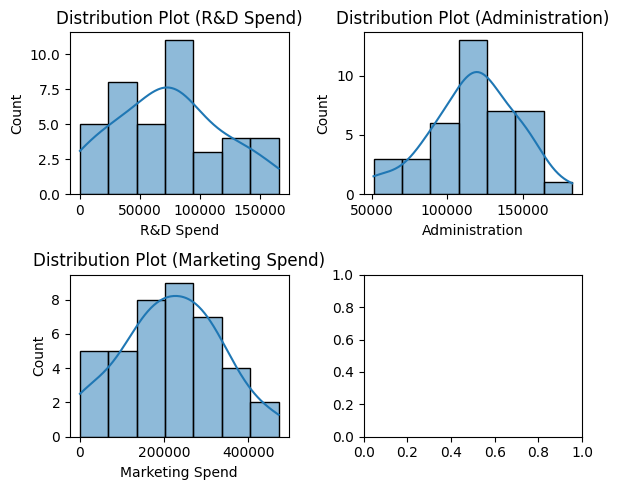

In [12]:
visualize_numvar(data_train, numvar_col, 'Profit', 'dist')

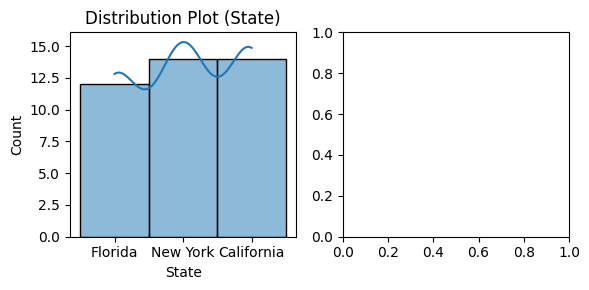

In [13]:
visualize_ctgvar(data_train, ctgvar_col, 'Profit', 'dist')

> The distribution of the categorical variables in the dataset appears to be relatively balanced across its categories, without any category significantly dominating the others.

## Box Plot

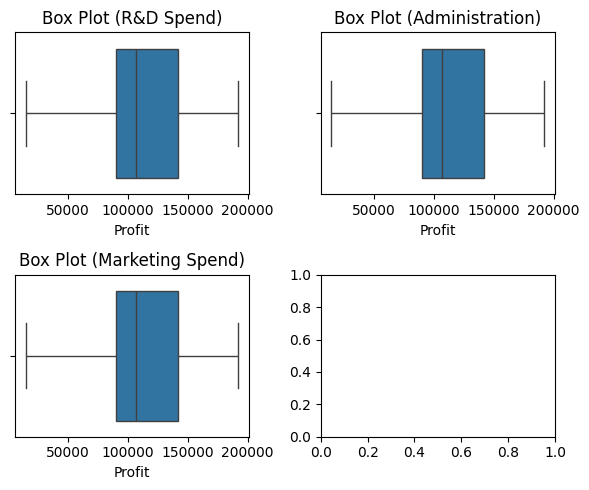

In [14]:
visualize_numvar(data_train, numvar_col, 'Profit', 'box')

> Based on the graph above, it seems that there is no outliers on the numerical independent variables in this dataset.

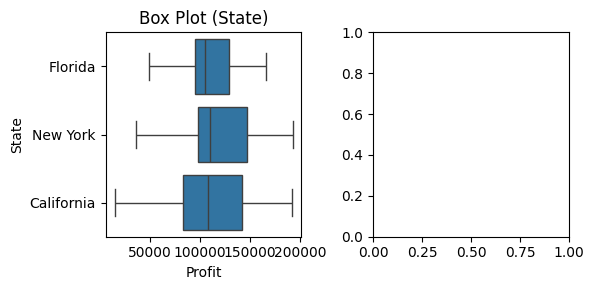

In [15]:
visualize_ctgvar(data_train, ctgvar_col, 'Profit', 'box')

> Based on the graph above, it seems that there is no outliers on the categorical independent variables in this dataset.

## Scatter Plot

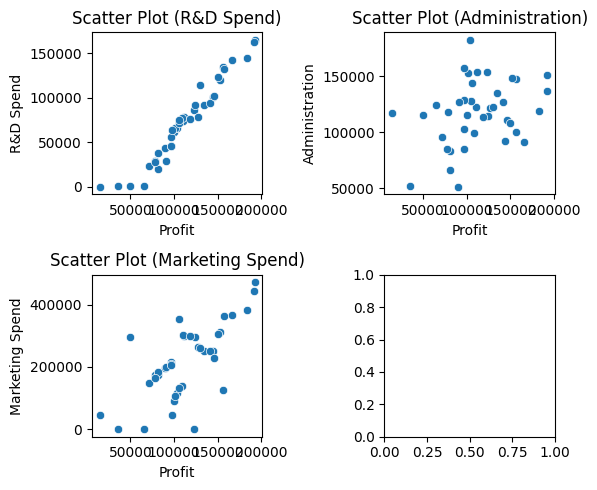

In [16]:
visualize_numvar(data_train, numvar_col, 'Profit', 'scatter')

## Correlation Analysis

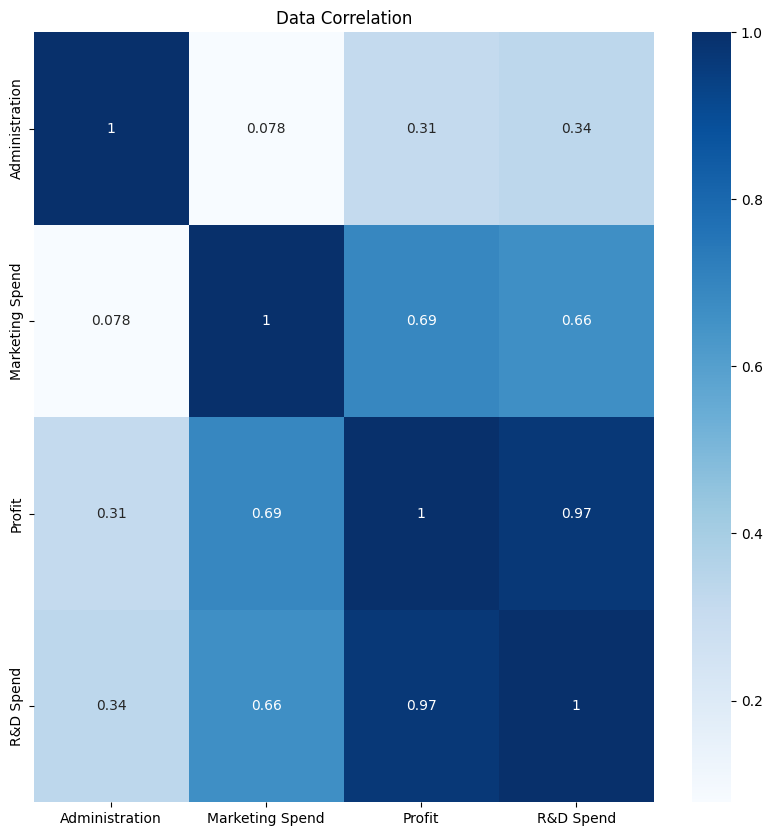

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_train[data_train.columns.difference(ctgvar_col)].corr(), cmap='Blues', annot=True) 
plt.title('Data Correlation')
plt.show()

> It's noteworthy that the correlation between the numerical independent variables and dependent variable ranges vary. The correlation between "Profit" and all numerical independent variables ranges from 0.31 to 0.97, which indicate a moderate to very strong positive relationship [1].

In [18]:
def generate_ANOVA(data, ctgvar_col, col_target):
  for col in ctgvar_col:
    unique_values = data[col].unique()
    lists = {}
    for val in unique_values:
      lists[val] = data[data[col] == val][col_target]
    fvalue, pvalue = stats.f_oneway(*lists.values())
    print('=======')
    print(f"Column: {col}")
    print(f"Fvalue: {fvalue}")
    print(f"Pvalue: {pvalue}")

In [19]:
generate_ANOVA(data_train, ctgvar_col, 'Profit')

Column: State
Fvalue: 0.14244483182520234
Pvalue: 0.8677086841926729


> The p-value obtained from the ANOVA test is used to determine whether the differences among the group means are statistically significant. A high p-value (typically above 0.05) indicates that the differences among the group means are not statistically significant [5]. As for the F-value, it is a measure of the overall variation of the model. The larger the F-value, the more likely greater variations between samples in the variables groups [6].

> In this case, the categorical variable "State" has a relationship with "Profit", resulting in an F-value of 0.142 and a p-value of 0.867. Given the high p-value, it suggests that there is no statistically significant difference in "Profit" across different "States".

> However, I decided to keep "State" despite its weak relationship with "Profit". In real-world business scenarios, state is indeed a crucial factor that can impact profitability. Therefore, even though it might not always have a direct impact on profits, state is still an essential part of business expenses. Hence, this approach adopts a comprehensive approach that mirrors the nature of business operations, providing a broader perspective to enhances understanding of the various factors that contribute to profitability.

> Next, checking multicollinearity using Variance Inflation Factor (VIF). For categorical variables, this can be done by creating dummy variables. However, when the number of created dummy variables equals the number of $k$ unique values, there is a possibility of a dummy variable trap. Dummy variable trap occurs when the number of dummy variables created is equal to the number of values the categorical value can take on which it leads to multicollinearity [7]. This can be avoided by creating $k-1$ dummy variables by dropping the most frequently appearing category.

In [20]:
data_train = pd.get_dummies(data_train, columns=ctgvar_col, drop_first=True, dtype=int)

In [21]:
def generate_VIF(data):
  vif_data = pd.DataFrame({
    'feature' : data.columns,
    'VIF' : [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
  })
  print(vif_data)

In [22]:
generate_VIF(data_train)

           feature        VIF
0        R&D Spend  30.551551
1   Administration  14.214948
2  Marketing Spend   9.095321
3           Profit  79.889706
4    State_Florida   1.892318
5   State_New York   1.953341


> The obtained Variance Inflation Factor (VIF) for the independent variables in the dataset indicates a correlation that is potentially severe for some variables and not for others [2]. The variables with the highest VIF are "R&D Spend" and "Administration" with score of 31.763841 and 14.305008 respectively, which are significantly higher than the general rule of thumb threshold of 10 [3]. This suggests signs of serious multicollinearity requiring correction. Therefore, based on these results, it can be concluded that while each variable brings some unique information to the model, the level of multicollinearity for certain variables is high enough to potentially distort the model significantly.

> However, for the same reasons as previously mentioned, in real-world business scenarios, research and development spend is indeed a crucial factor that can impact profitability. Hence, I decided to keep "R&D Spend" despite its high VIF.

# Feature Transformation

In [23]:
scalar = StandardScaler()

In [24]:
data_train[numvar_col] = scalar.fit_transform(data_train[numvar_col])
data_train.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
30,-0.267707,-0.068437,-1.089872,99937.59,1,0
21,0.100391,1.275733,0.714421,111313.02,0,1
19,0.280684,1.266592,-1.878092,122776.86,0,1
11,0.600673,-0.909181,0.282019,144259.40,0,0
22,0.001717,0.183302,0.745402,110352.25,1,0


# Data Splitting

In [25]:
data_train, data_valid = split_dataset(data_train.drop(columns='Profit'), data_train['Profit'], 0.75, 1)

> Dividing the training data into training and validation sets using a 3:1 ratio.

# Model Building

In [26]:
class linear_regression:
  def __init__(self, w, b):
    self.w = w
    self.b = b

  def predict(self, x):
    return np.dot(x, self.w) + self.b

  def update_w(self, x, y, y_predict):
    return np.dot((y_predict - y), x) / len(y) * 2

  def update_b(self, y, y_predict):
    return sum(y_predict - y) / len(y) * 2

  def loss_function(self, y, y_predict):
    return np.sum((y - y_predict)**2) / len(y)

  def fit(self, x, y, learn_rate, epochs):
    loss = []
    for i in range(epochs):
      y_predict = self.predict(x)
      self.b = self.b - learn_rate * self.update_b(y, y_predict)
      self.w = self.w - learn_rate * self.update_w(x, y, y_predict)
      loss.append(self.loss_function(y, y_predict))
    return loss

In [27]:
def loss_visualization(loss, learn_rate, epochs):
  for i in range(len(loss)):
    plt.plot(np.arange(1, epochs), loss[i][1:], label=learn_rate[i])
  plt.title('Number of Epochs vs Loss')
  plt.xlabel('Number of Epochs', size=10)
  plt.ylabel('Loss', size=10)
  plt.legend()

> Besides weights and bias, we also need to optimize the learning rate. In this case, we will try using several learning rates to see the most effective learning rates with this dataset.

In [28]:
losses, w, b = [], [], []
learn_rates = [0.005, 0.01, 0.05, 0.1, 0.3]
epochs = 5000

for i in range(len(learn_rates)):
  model = linear_regression(np.zeros(data_train.drop(columns='Profit').shape[1]), 0)
  losses.append(model.fit(data_train.drop(columns='Profit'), data_train['Profit'], learn_rates[i], epochs))
  w.append(model.w)
  b.append(model.b)

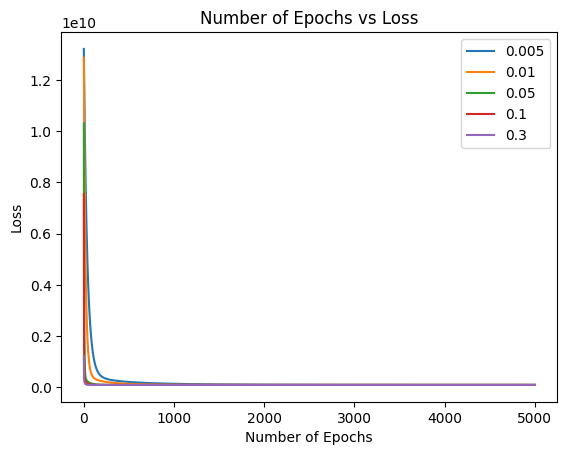

In [29]:
loss_visualization(losses, learn_rates, epochs)

In [30]:
loss = []
for i in range(len(learn_rates)):
  loss.append([learn_rates[i], losses[i][epochs - 2]])
loss = sorted(loss, key=lambda x:x[1])
print(f"Learning rate ({loss[0][0]}) produces smallest loss: {loss[0][1]}")

Learning rate (0.05) produces smallest loss: 86430170.92406334


> Based on the results above, it can be concluded that learning rate 0.05 is the most effective in minimizing the loss on this dataset (closest to 0). However, it is important to note that the loss score remains relatively high.

In [31]:
print(f"Weights: {w[2]}")
print(f"Bias: {b[2]}")

Weights: [36564.18639527  -552.7715899   3218.91428611   943.08347566
  1091.21040318]
Bias: 110778.89775416834


> This weights and bias will be used on the final model in the next part.

## Train The Final Model

In [32]:
loss = []
learn_rate = [0.05]
model_final = linear_regression(w[2], b[2])
loss.append(model.fit(data_train.drop(columns='Profit'), data_train['Profit'], learn_rates[0], epochs))

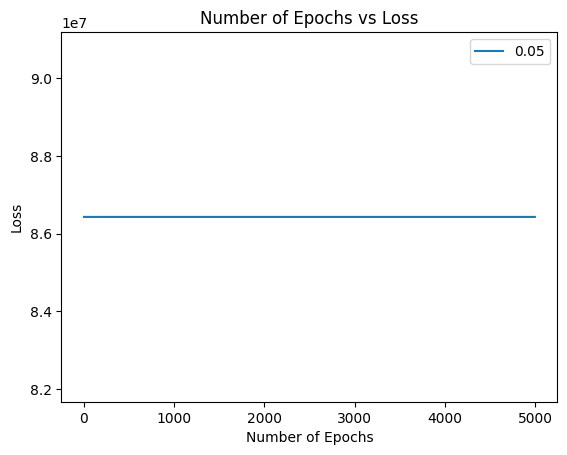

In [33]:
loss_visualization(loss, learn_rate, epochs)

> The loss score remains constant during the training of the final model, indicating that the model parameters have likely converged and further training does not significantly reduce the loss.

In [34]:
print(f"Weights: {model_final.w}")
print(f"Bias: {model_final.b}")

Weights: [36564.18639527  -552.7715899   3218.91428611   943.08347566
  1091.21040318]
Bias: 110778.89775416834


# Model Evaluation

In [35]:
data_valid['Profit predict'] = model_final.predict(data_valid.drop(columns='Profit'))
data_valid.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York,Profit,Profit predict
19,0.280684,1.266592,-1.878092,0,1,122776.86,115387.523381
36,-1.016041,0.333943,-0.138489,1,0,90708.19,73940.878012
11,0.600673,-0.909181,0.282019,0,0,144259.40,134152.368322
26,0.031675,0.936010,-0.718655,1,0,105733.54,110049.445690
12,0.447816,0.343255,0.282840,1,0,141585.52,128816.705770


In [36]:
print(f"Loss: {model_final.loss_function(data_valid['Profit'], data_valid['Profit predict']):.3f}")

Loss: 83116017.885


In [37]:
print(f"R2 Score: {r2_score(data_valid['Profit'], data_valid['Profit predict']):.3f}")

R2 Score: 0.821


> This model achieved a Mean Squared Error (MSE) score of 83116017.885. This high MSE indicates that there is a significant difference between the predicted and actual values. However, this model also achieved an R-squared (R²) score of 0.821. This suggests that approximately 82.1% of the variance in the dependent variable can be explained by the model's independent variables [4].

> Hence, it can be concluded that this final model provides a reasonable baseline prediction. However, the high MSE score indicates that the predictions may not closely match the actual values.

## Predict using Test Dataset

In [38]:
data_test = pd.get_dummies(data_test, columns=ctgvar_col, drop_first=True, dtype=int)

In [39]:
data_test[numvar_col] = scalar.fit_transform(data_test[numvar_col])
data_test.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
7,1.173741,0.492425,0.994469,155752.60,1,0
44,-1.038602,0.992300,-1.146075,65200.33,0,0
43,-1.175124,-0.485531,-1.093931,69758.98,0,1
25,-0.169240,0.170339,-0.352065,107404.34,0,0
14,0.961861,1.086135,0.506569,132602.65,1,0


In [40]:
data_test['Profit predict'] = model_final.predict(data_test.drop(columns='Profit'))
data_test.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York,Profit predict
7,1.173741,0.492425,0.994469,155752.60,1,0,157567.777470
44,-1.038602,0.992300,-1.146075,65200.33,0,0,68565.634297
43,-1.175124,-0.485531,-1.093931,69758.98,0,1,65649.791307
25,-0.169240,0.170339,-0.352065,107404.34,0,0,103363.350845
14,0.961861,1.086135,0.506569,132602.65,1,0,147921.855833


In [41]:
print(f"Loss: {model_final.loss_function(data_test['Profit'], data_test['Profit predict']):.3f}")

Loss: 57253490.058


In [42]:
print(f"R2 Score: {r2_score(data_test['Profit'], data_test['Profit predict']):.3f}")

R2 Score: 0.968


> This model achieved a Mean Squared Error (MSE) score of 57253490.058. This high MSE indicates that there is a significant difference between the predicted and actual values. However, this model also achieved an R-squared (R²) score of 0.968. This suggests that approximately 96.8% of the variance in the dependent variable can be explained by the model's independent variables [4].

> Hence, it can be concluded that this final model provides a reasonable baseline prediction. However, the high MSE score indicates that the predictions may not closely match the actual values.

> In conclusion, the model has shown a high level of performance in both the validation and testing phases in terms of R-squared (R²). Despite the high MSE scores, the strong R² scores indicate that the model has a good fit to the data. Therefore, while the model's predictions may not closely align with the actual values due to the high MSE, its high R² scores indicate that it can still be a useful tool for making further predictions.

# Visualize

In [43]:
data = pd.concat([data_valid, data_test])

In [44]:
def visualize_final(data, title, xlabel, ylabel):
  xl = np.array([min(min(data[xlabel]), min(data[ylabel])), max(max(data[xlabel]), max(data[ylabel]))])
  plt.plot(xl, xl, color = 'black', linestyle = 'dashed')
  plt.scatter(data[xlabel], data[ylabel])
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

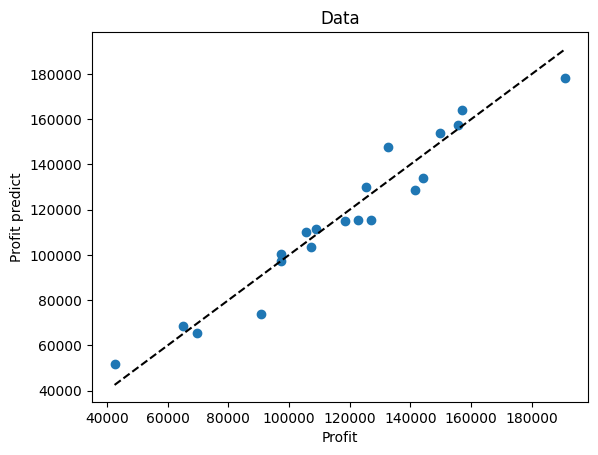

In [45]:
visualize_final(data, 'Data', 'Profit', 'Profit predict')